##Nama : Alif Almuqsit
##NIM : 09011281823138
##Kelas : SKB Inderalaya

<b>Source code : Dicoding.com</b>

<p>Program ini saya jalankan melalui <b>Google colaboratory</b>. Saya memilih environment ini karena kemudahan dalam transfer data melalui internet dan tambahan Cloud GPU untuk memproses data. Selain itu, Environment ini juga dapat berprilaku layaknya sistem operasi Linux (Ubuntu). </p>
<p>
<p>Google Colaboratory juga menyediakan penyimpanan secara cloud. Sehingga, penyimpanan tersebut dapat dimanfaatkan untuk pengolahan data tanpa mengganggu penyimpanan perangkat kita.</p>
<p><b>Ini merupakan program untuk membuat model yang dapat menentukan ruangan yang rapi dan berantakan.</b></p>

Pertama, saya ingin memeriksa versi python terlebih dahulu.

In [1]:
!python --version

Python 3.6.9


Saya juga ingin mengetahui Version Sistem Operasinya.

In [2]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


Kemudian, saya akan mengambil data dari https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip dan memasukkannya ke dalam program ini. Saya menggunakan folder <b>/tmp/</b> sebagai tempat pengolahan data nanti.

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-10-27 03:57:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  4.69MB/s    in 17s     

2020-10-27 03:58:13 (3.99 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



Selanjutnya, kita ekstrak file yang telah kita unduh tadi. Untuk dapat mengekstrak file *.zip tersebut kita memerlukan sebuah library python yang dapat melakukan ekstraksi file tersebut.

In [4]:
import zipfile,os

Setelah itu, kita ekstrak.

In [5]:
local_zip = '/tmp/messy_vs_clean_room.zip'   # Memasukan file atau alamat file tadi ke dalam variabel local_zip.
zip_ref = zipfile.ZipFile(local_zip, 'r')    # Manjadikan local_zip dapat dibaca sistem dan memasukannya ke dalam variabel
                                             # zip_ref.
zip_ref.extractall('/tmp')                   # Melakukan ekstraksi zip_ref ke dalam folder /temp.
zip_ref.close()                              # Menutup atau menghancurkan referensi file atau alamat file yang telah 
                                             # dimasukan ke dalam variabel tadi.
os.listdir('/tmp/images')

['test', 'train', 'images', 'val']

Setelah diekstrak, akan muncul folder images di folder /tmp. Folder images nanti akan terdapat 4 folder yaitu images, test, train dan val. Di dalam folder train dan val terdapat folder clean dan messy yang berisi gambar yang akan diolah.

In [6]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [7]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [8]:
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Selanjutnya, Kita akan melakukan Image data generator agar data image yang akan digunakan lebih bervariasi.

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Selanjutnya, kita buat model machine learning dalam hal ini <b>Arficial Neural Network (ANN)</b> menggunakan library keras dengan metode sequential.

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Agar model menjadi lebih baik, kita gunakan optimizer yang disedikan oleh library keras.

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

Selanjutnya kita lakukan fitting, artinya kita menurunkan persentase error sehingga dapat meningkatkan akurasi model.

In [25]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 1s - loss: 0.6905 - accuracy: 0.5400 - val_loss: 0.6991 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 1s - loss: 0.6925 - accuracy: 0.5300 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 1s - loss: 0.6946 - accuracy: 0.5200 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 1s - loss: 0.6861 - accuracy: 0.5600 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 1s - loss: 0.6943 - accuracy: 0.5200 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 1s - loss: 0.6900 - accuracy: 0.5400 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 1s - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 1s - loss: 0.6786 - accuracy: 0.6000 - val_loss: 0.6783 - val_accuracy: 0.6000
Epoch 9/20
25/25 - 1s - loss: 0.6631 - accuracy: 0.6700 - val_loss: 0.6328 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 1s - loss: 0.6777 - accuracy: 0.5900 - val_loss: 0.6390 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

<b>Terakhir, kita uji coba model pada input manual gambar. Apakah model dapat menentukan, manakah ruangan yang bersih dan manakah ruangan yang kotor???</b>

Saving K5.jpg to K5.jpg
[[0.4272765]]
Berantakan


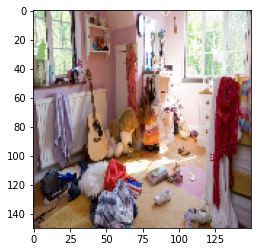

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(classes)
  if classes==0:
    print('Rapi')
  else:
    print('Berantakan')

<b>Tingkat akurasi model ditentukan oleh metode pembuatan model dan juga data yang digunakan untuk training dan testing model.</b>